In [1]:
# import needed libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import argrelextrema

In [2]:
# define ODE model
def goodwin (x0,t,parameters):
    # parameters
    p1 = parameters['p1'] #production rate of x
    p2 = parameters['p2'] #production rate of y
    p3 = parameters['p3'] #production rate of z
    d1 = parameters['d1'] #degradation rate of x
    d2 = parameters['d2'] #degradation rate of y
    d3 = parameters['d3'] #degradation rate of z
    K = parameters['K'] #EC50 for the Hill curve
    h = parameters['h'] #Hill exponent
    # variables
    x = x0[0]
    y = x0[1]
    z = x0[2]
    # ODEs
    dxdt = p1* K**h / (K**h + z**h) - d1*x
    dydt = p2*x - d2*y
    dzdt = p3*y - d3*z
    return [dxdt, dydt, dzdt]

Text(0.5, 0.98, 'Goodwin model for Hill coeff. h=6')

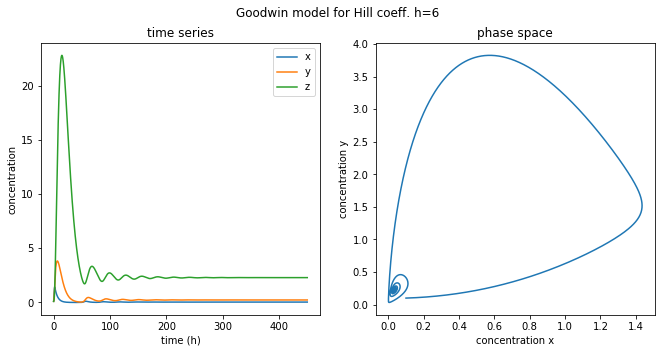

In [3]:
# define time, initial conditions and parameters for integration
t = np.arange(0, 450, 0.01)
x0 = [0.1, 0.1, 0.1]
parameters = {'p1':1, 'p2':1, 'p3':1,
              'd1':0.2, 'd2':0.15, 'd3':0.1,
              'K':1,  'h':6}

# solve ODE model
sol = odeint(goodwin, x0, t, args=(parameters,))
x = sol[:,0] 
y = sol[:,1] 
z = sol[:,2] 

# plot solution 
# subplot 1: time series
fig1 = plt.figure(figsize=(11,5))

ax1 = fig1.add_subplot(121)
ax1.plot(t, x, label='x')
ax1.plot(t, y, label='y')
ax1.plot(t, z, label='z')
ax1.legend()
ax1.set_xlabel('time (h)'); ax1.set_ylabel('concentration')
ax1.set_title('time series')

# subplot 2: phase space 
ax1 = fig1.add_subplot(122)
ax1.plot(x, y)
ax1.set_xlabel('concentration x'); ax1.set_ylabel('concentration y')
ax1.set_title('phase space')
fig1.suptitle('Goodwin model for Hill coeff. h={}'.format(parameters['h']))

Text(0.5, 0.98, 'Goodwin model for h=10')

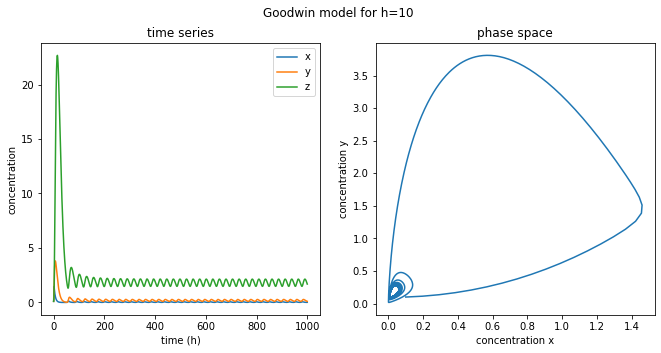

In [4]:
# increase Hill coefficient
parameters['h'] = 10 
dt = .1
t = np.arange(0, 1000, dt) #increase time array for integration

# solve ODE model
sol = odeint(goodwin, x0, t, args=(parameters,))
x = sol[:,0] 
y = sol[:,1] 
z = sol[:,2] 

# plot solution 
# subplot 1: time series
fig2 = plt.figure(figsize=(11,5))

ax1 = fig2.add_subplot(121)
ax1.plot(t, x, label='x')
ax1.plot(t, y, label='y')
ax1.plot(t, z, label='z')
ax1.legend()
ax1.set_xlabel('time (h)'); ax1.set_ylabel('concentration')
ax1.set_title('time series')

# subplot 2: phase space 
ax1 = fig2.add_subplot(122)
ax1.plot(x, y)
ax1.set_xlabel('concentration x'); ax1.set_ylabel('concentration y')
ax1.set_title('phase space')

fig2.suptitle('Goodwin model for h={}'.format(parameters['h']))

Text(0.5, 0.98, 'Goodwin model for h=10, d3=0.1')

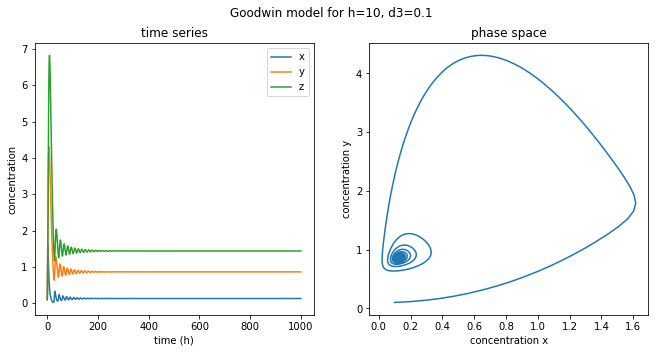

In [5]:
# Is the point of change affected by the choice of d1, d2, d3? Let's change these parameters and see
parameters2 = parameters.copy()
parameters2['d3'] = 0.6

# solve ODE model
sol2 = odeint(goodwin, x0, t, args=(parameters2,))
x2 = sol2[:,0] 
y2 = sol2[:,1] 
z2 = sol2[:,2] 

# plot solution 
# subplot 1: time series
fig3 = plt.figure(figsize=(11,5))

ax1 = fig3.add_subplot(121)
ax1.plot(t, x2, label='x')
ax1.plot(t, y2, label='y')
ax1.plot(t, z2, label='z')
ax1.legend()
ax1.set_xlabel('time (h)'); ax1.set_ylabel('concentration')
ax1.set_title('time series')

# subplot 2: phase space 
ax1 = fig3.add_subplot(122)
ax1.plot(x2, y2)
ax1.set_xlabel('concentration x'); ax1.set_ylabel('concentration y')
ax1.set_title('phase space')

fig3.suptitle('Goodwin model for h={}, d3={}'.format(parameters['h'], parameters['d3']))

3.1896321719452407 3.1896321719452407
2.2907801080698587 2.2907801080698587
1.9056502574023666 1.9056502574023666
[2.14026761 2.14027977 2.1402833  2.14027824 2.1402647  2.14027677
 2.14028276 2.14028033 2.14027014 2.14027233 2.14028177 2.1402825
 2.14027472 2.14026612 2.14027889 2.14028293 2.14027833 2.14026545
 2.14027507 2.14028213 2.14028068 2.1402708  2.14027058 2.14028081
 2.14028254 2.14027548 2.14026478 2.140278   2.14028264 2.14027932
 2.14026751 2.1402745  2.1402822  2.1402816  2.14027248 2.14026914
 2.14028046 2.14028288 2.14027683 2.14026322 2.14027716 2.14028287
 2.14027992 2.14026843 2.14027335 2.14028189 2.14028195 2.14027367
 2.14026775 2.14027929 2.14028241 2.14027761 2.14026408 2.14027621
 2.14028247 2.14028053 2.14027021 2.14027234 2.14028187 2.14028274
 2.14027504 2.1402667  2.14027905 2.14028308 2.14027828 2.14026571
 2.14027539 2.14028237 2.1402808  2.14027078 2.14027063 2.14028109
 2.14028285 2.14027588 2.14026474 2.14027834 2.14028303 2.14027932
 2.14026697 2.14

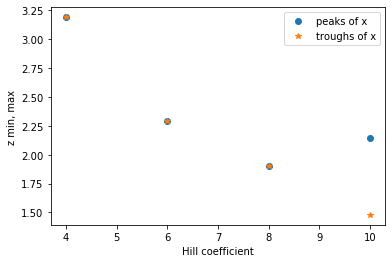

In [8]:
# Hopf bifurcation
# ----------------
# find peaks and troughs for n=4, 6, 8, 10 
hill_values = np.array([4,6,8,10])
t = np.arange(0, 10000, dt)

peaks_z, troughs_z = [], [] #empty lists to store results
for h in hill_values:
    # change Hill coefficient in each iteration
    parameters['h'] = h

    # solve ODE for new Hill value and focus only on the limit cycle
    sol = odeint(goodwin, x0, t, args=(parameters,))
    sol_LC = sol[-int(2500/dt):, :] #take last fourth of the time series

    # calculate peaks and troughs of z
    z_LC = sol_LC[:,2]
    indexes_z_max = argrelextrema(z_LC, np.greater)[0]
    indexes_z_min = argrelextrema(z_LC, np.less)[0]
    max_z = z_LC[indexes_z_max]
    min_z = z_LC[indexes_z_min]

    # maybe the system doesn't oscillate at all and argrelextrema cannot find any max/min:
    # in that case we take as max_z or min_z the last value of the time series (steady state)
    max_z = max_z if len(max_z)>1 else z_LC[-1]
    min_z = min_z if len(min_z)>1 else z_LC[-1]    
    print(max_z, min_z)

    # take average of peaks and average of troughs as the oscillation's peak/trough
    peak_z = max_z.mean() 
    trough_z = min_z.mean() 
    
    # append and store in the peaks_z / troughs_z lists
    peaks_z.append(peak_z); troughs_z.append(trough_z)

peaks_z = np.asarray(peaks_z)
troughs_z = np.asarray(troughs_z)

# plot results: peaks and troughs of x vs Hill coefficients
fig6 = plt.figure()
ax1 = fig6.add_subplot(111)
ax1.plot(hill_values, peaks_z, 'o', label='peaks of x')
ax1.plot(hill_values, troughs_z, '*', label='troughs of x')
ax1.set_xlabel('Hill coefficient'); ax1.set_ylabel('z min, max')
ax1.legend()



Text(0, 0.5, 'z min, max')

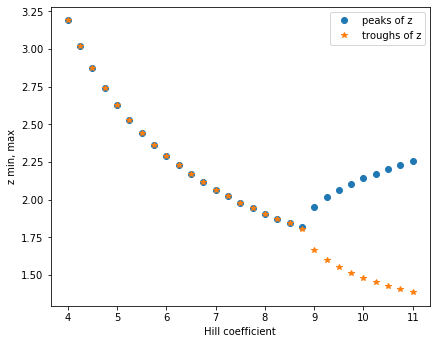

In [7]:
# now do the same but increasing the Hill coefficient by steps of 0.25
hill_values = np.arange(4, 11.25, 0.25)
t = np.arange(0, 10000, dt)

peaks_z, troughs_z = [], [] #empty lists to store results
for h in hill_values:
    # change Hill coefficient in each iteration
    parameters['h'] = h

    # solve ODE for new Hill value and focus only on the limit cycle
    sol = odeint(goodwin, x0, t, args=(parameters,))
    sol_LC = sol[-int(2500/dt):, :] #take last fourth of the time series

    # calculate peaks and troughs of z
    # --------------------------------
    z_LC = sol_LC[:,2]
    indexes_z_max = argrelextrema(z_LC, np.greater)[0]
    indexes_z_min = argrelextrema(z_LC, np.less)[0]
    max_z = z_LC[indexes_z_max]
    min_z = z_LC[indexes_z_min]

    # maybe the system doesn't oscillate at all and argrelextrema cannot find any max/min:
    # in that case we take as max_z or min_z the last value of the time series (steady state)
    max_z = max_z if len(max_z)>1 else z_LC[-1]
    min_z = min_z if len(min_z)>1 else z_LC[-1]    

    # take average of peaks and average of troughs as the oscillation's peak/trough
    peak_z = max_z.mean() 
    trough_z = min_z.mean() 
    
    # append and store in the peaks_z / troughs_z lists
    peaks_z.append(peak_z); troughs_z.append(trough_z)

peaks_z = np.asarray(peaks_z)
troughs_z = np.asarray(troughs_z)

# plot results: peaks and troughs of x vs Hill coefficients
fig7 = plt.figure(figsize=(6.8,5.5))
ax1 = fig7.add_subplot(111)
ax1.plot(hill_values, peaks_z, 'o', label='peaks of z')
ax1.plot(hill_values, troughs_z, '*', label='troughs of z')
ax1.legend()
ax1.set_xlabel('Hill coefficient'); ax1.set_ylabel('z min, max')
